In [1]:
import sys
import numpy as np
import matplotlib.patches as patches
from collections import defaultdict
import pandas as pd

In [2]:
%run constants.py

In [3]:
%run "/Users/audreyburggraf/Desktop/QUEEN'S/THESIS RESEARCH/PLOTTING C29 989/FUNCTIONS/load_functions"

In [4]:
%run "/Users/audreyburggraf/Desktop/QUEEN'S/THESIS RESEARCH/PLOTTING C29 989/FITS FILES/BAND4/load_band4_data.py"

In [5]:
%run "/Users/audreyburggraf/Desktop/QUEEN'S/THESIS RESEARCH/PLOTTING C29 989/CARTA FILES/BAND4/load_carta_data_band4.py"

## Stokes I cbar ticks

In [6]:
StokesI_stretched, StokesI_unstretched_cbar_ticks = normalize_stokesI_for_cmap(StokesI_data_2d_mJy)

## Beam info

In [7]:
# Beam Info

beam_info = get_beam_info(StokesI_header)

BMAJ_deg, BMIN_deg, BMAJ_pix, BMIN_pix, BPA_astronomy_deg, BPA_deg_cartesian = beam_info

print(f'The angle in astronomy angles is {BPA_astronomy_deg:.3f} degrees')
print(f'The angle in cartesian angles is {BPA_deg_cartesian:.3f} degrees')

The angle in astronomy angles is -81.147 degrees
The angle in cartesian angles is 8.853 degrees


## Constants from Band 6

In [8]:
RA_min_pix, Dec_min_pix = string_to_pixel(min_str_band6, StokesI_wcs)
RA_max_pix, Dec_max_pix = string_to_pixel(max_str_band6, StokesI_wcs)


xmin = RA_max_pix
xmax = RA_min_pix

ymin = Dec_min_pix
ymax = Dec_max_pix

In [9]:
reference_length_pix = length_in_pixels(reference_length_AU, distance_pc, StokesI_header)

# Plotting Stokes I and Polarization Intensity

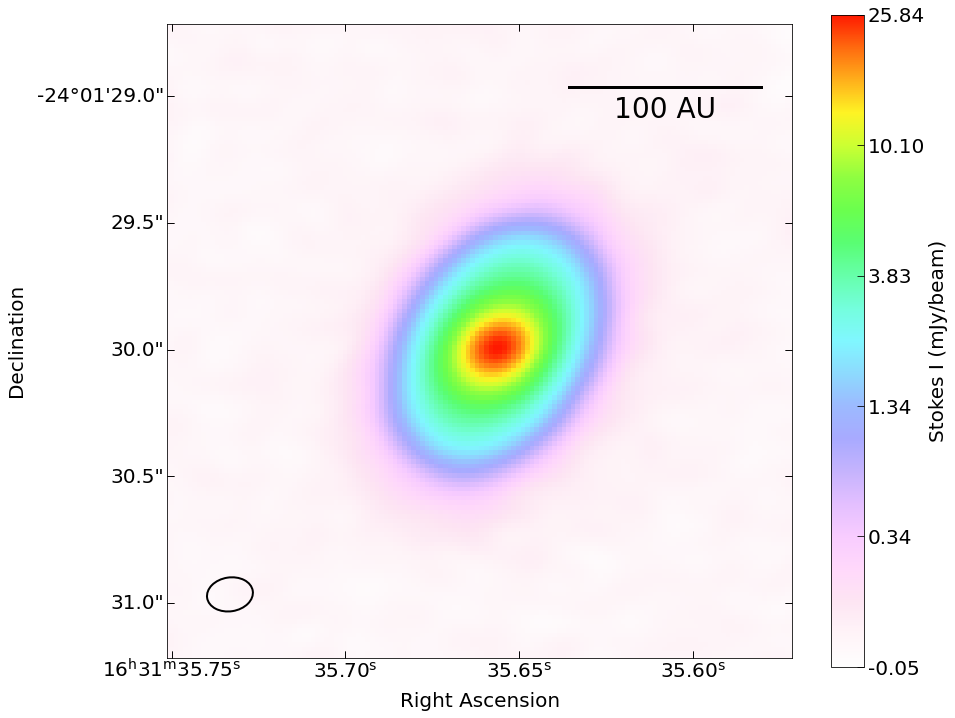

In [10]:
fig, ax = create_stokes_i_base_plot(StokesI_wcs, StokesI_stretched, soft_colormap_v2, 
                                    normalized_cbar_ticks, StokesI_unstretched_cbar_ticks, 
                                    xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                                    BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                                    max_length_pix, reference_fraction)

## Make Polarization Intensity Plot

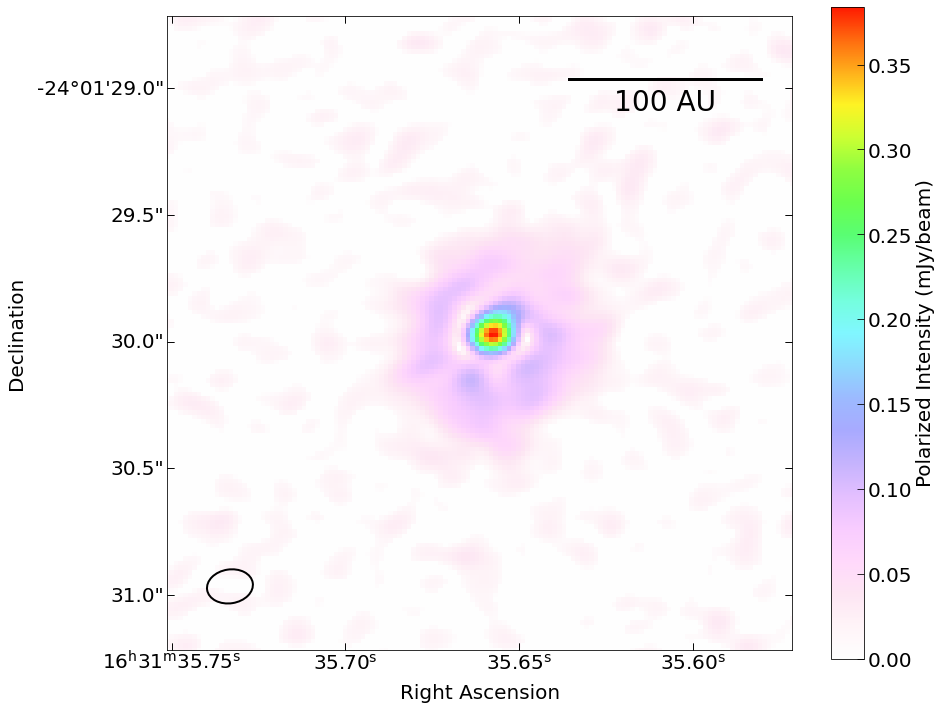

In [11]:
fig, ax = create_base_plot(StokesI_wcs, 
                           PolarizedIntensity_data_2d_mJy, 'Polarized Intensity (mJy/beam)',
                           soft_colormap_v2, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)

## Calculate Vectors

In [12]:
nx, ny = StokesI_data_2d_mJy.shape

In [13]:
# Actual vectors with the same length
# --------------------------------------------------------------------------------------------------      
# List to store vector data
vector_data_actual_same_length_cartesian = []
vector_angle_actual_same_length_astronomy = []

# Loop over values in x and y
for x in range(0, nx, step):
    for y in range(0, ny, step):
        # Check if the conditions are met
        if (StokesI_data_2d_mJy[y, x] / StokesIerr_data_2d_mJy[y, x] > 3 and 
            # PolarizedIntensity_data_2d_mJy[y, x] / PolarizedIntensity_err_data_2d_mJy[y, x] > 3 and 
            PolarizationAngle_err_data_2d_deg[y, x] < 10): 
            
            # Get the polarization angle at this pixel
            
            angle_rad_cartesian = PolarizationAngle_data_2d_rad[y, x] + np.pi / 2
            
            # Compute the vector components
            dx = vector_length_pix_const * np.cos(angle_rad_cartesian)
            dy = vector_length_pix_const * np.sin(angle_rad_cartesian)
            
            # Store vector data in a row
            vector_data_actual_same_length_cartesian.append([x - dx / 2, x + dx / 2, y - dy / 2, y + dy / 2])
            vector_angle_actual_same_length_astronomy.append(PolarizationAngle_data_2d_rad[y, x])
# --------------------------------------------------------------------------------------------------          

## Add vectors to both plots

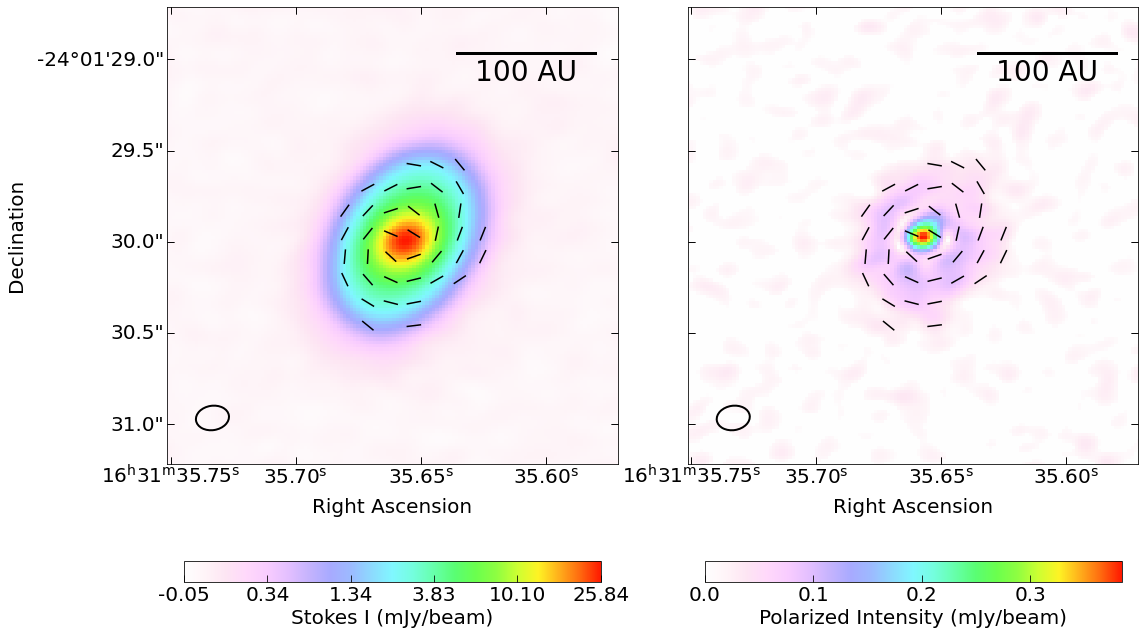

In [14]:
fig, ax = create_stokes_i_plus_one_base_plot(StokesI_wcs, StokesI_stretched, 
                                             normalized_cbar_ticks, StokesI_unstretched_cbar_ticks, 
                                             PolarizedIntensity_data_2d_mJy, 'Polarized Intensity (mJy/beam)',
                                             soft_colormap_v2, 
                                             xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                                             BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                                             max_length_pix, reference_fraction)

for row in vector_data_actual_same_length_cartesian:
    ax[0].plot([row[0], row[1]], [row[2], row[3]], color='black')
    
    
for row in vector_data_actual_same_length_cartesian:
    ax[1].plot([row[0], row[1]], [row[2], row[3]], color='black')

# Slices Along Major and Minor Axes

In [15]:
major_data_StokesI, major_offset_arcsec_StokesI, minor_data_StokesI, minor_offset_arcsec_StokesI = run_slices(StokesI_data_2d_mJy, 
                                                                                                              StokesI_header,
                                                                                                              StokesI_wcs,
                                                                                                              len(carta_major_data_mJy_StokesI),
                                                                                                              xmin, xmax, ymin, ymax,
                                                                                                              6)

In [16]:
major_data_POLI, major_offset_arcsec_POLI, minor_data_POLI, minor_offset_arcsec_POLI = run_slices(PolarizedIntensity_data_2d_mJy, 
                                                                                                  StokesI_header,
                                                                                                  StokesI_wcs, 
                                                                                                  len(carta_major_data_mJy_POLI),
                                                                                                  xmin, xmax, ymin, ymax, 
                                                                                                  6)

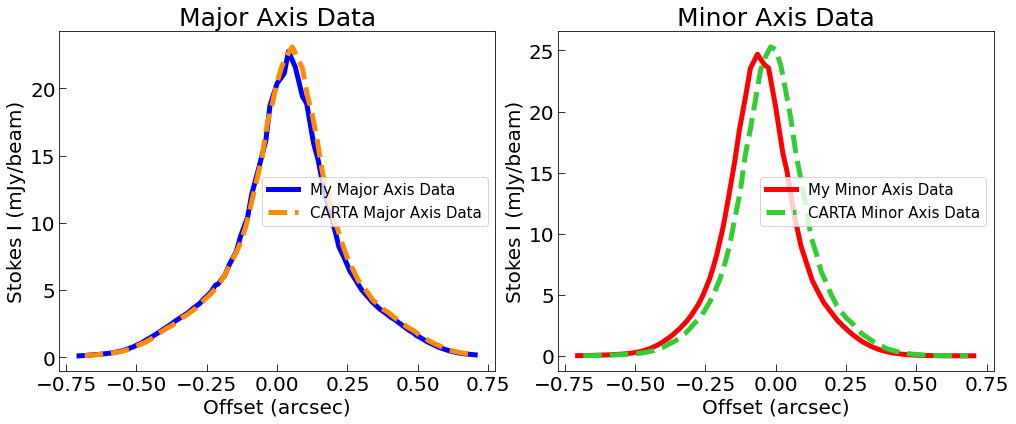

In [17]:
ax = plot_slices_along_axes(
    major_data_StokesI,
    minor_data_StokesI,
    carta_major_data_mJy_StokesI,
    carta_minor_data_mJy_StokesI,
    major_offset_arcsec_StokesI,
    minor_offset_arcsec_StokesI,
    carta_major_offset_StokesI,
    carta_minor_offset_StokesI,
    y_label="Stokes I (mJy/beam)",
    type_of_plot="Line",  # or "Scatter",
    cb_friendly = False,
    vline = False
)


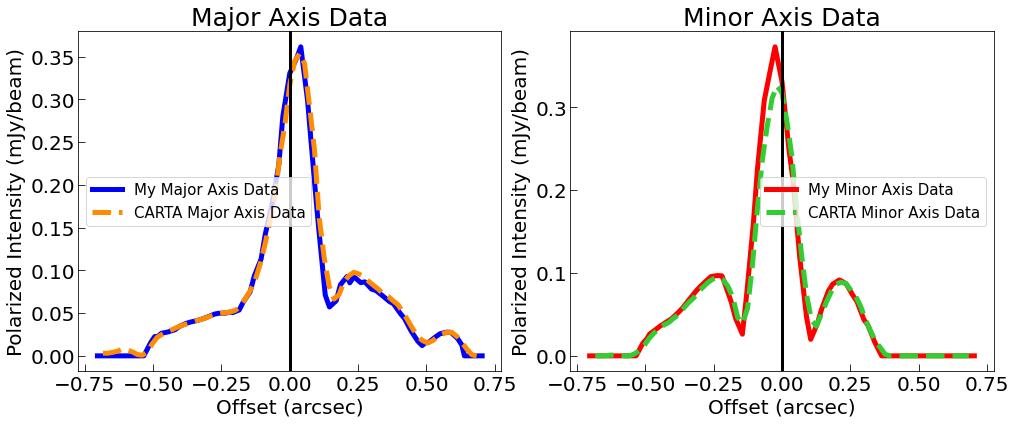

In [18]:
ax = plot_slices_along_axes(
    major_data_POLI,
    minor_data_POLI,
    carta_major_data_mJy_POLI,
    carta_minor_data_mJy_POLI,
    major_offset_arcsec_POLI,
    minor_offset_arcsec_POLI,
    carta_major_offset_POLI,
    carta_minor_offset_POLI,
    y_label="Polarized Intensity (mJy/beam)",
    type_of_plot="Line",  # or "Scatter"
    cb_friendly = False,
    vline = True
)

# Ratio Models

In [19]:
RA_centre_pix, Dec_centre_pix = string_to_pixel(centre_str_band6, StokesI_wcs)

In [20]:
PA_grid_100Uniform = make_PA_grid_100Uniform(ny, nx, minor_angle_rad_sky_band6)
PA_grid_100Azimuthal = make_PA_grid_100Azimuthal(ny, nx, RA_centre_pix, Dec_centre_pix)

In [21]:
StokesQ_grid_100Uniform,   StokesU_grid_100Uniform   = recover_StokesQU(PA_grid_100Uniform,   StokesI_data_2d_mJy, ny, nx)
StokesQ_grid_100Azimuthal, StokesU_grid_100Azimuthal = recover_StokesQU(PA_grid_100Azimuthal, StokesI_data_2d_mJy, ny, nx)

In [22]:
vector_data_plotting_grid, vector_data_list_100U_to_100A, testing_vector_angles = ratio_model_band4(StokesQ_grid_100Uniform, StokesU_grid_100Uniform,
                                                                                           StokesQ_grid_100Azimuthal, StokesU_grid_100Azimuthal,
                                                                                           ny, nx,
                                                                                           PolarizedIntensity_data_2d_mJy, PolarizedIntensity_err_data_2d_mJy, 
                                                                                           StokesI_data_2d_mJy, StokesIerr_data_2d_mJy,
                                                                                           PolarizationAngle_err_data_2d_deg)

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


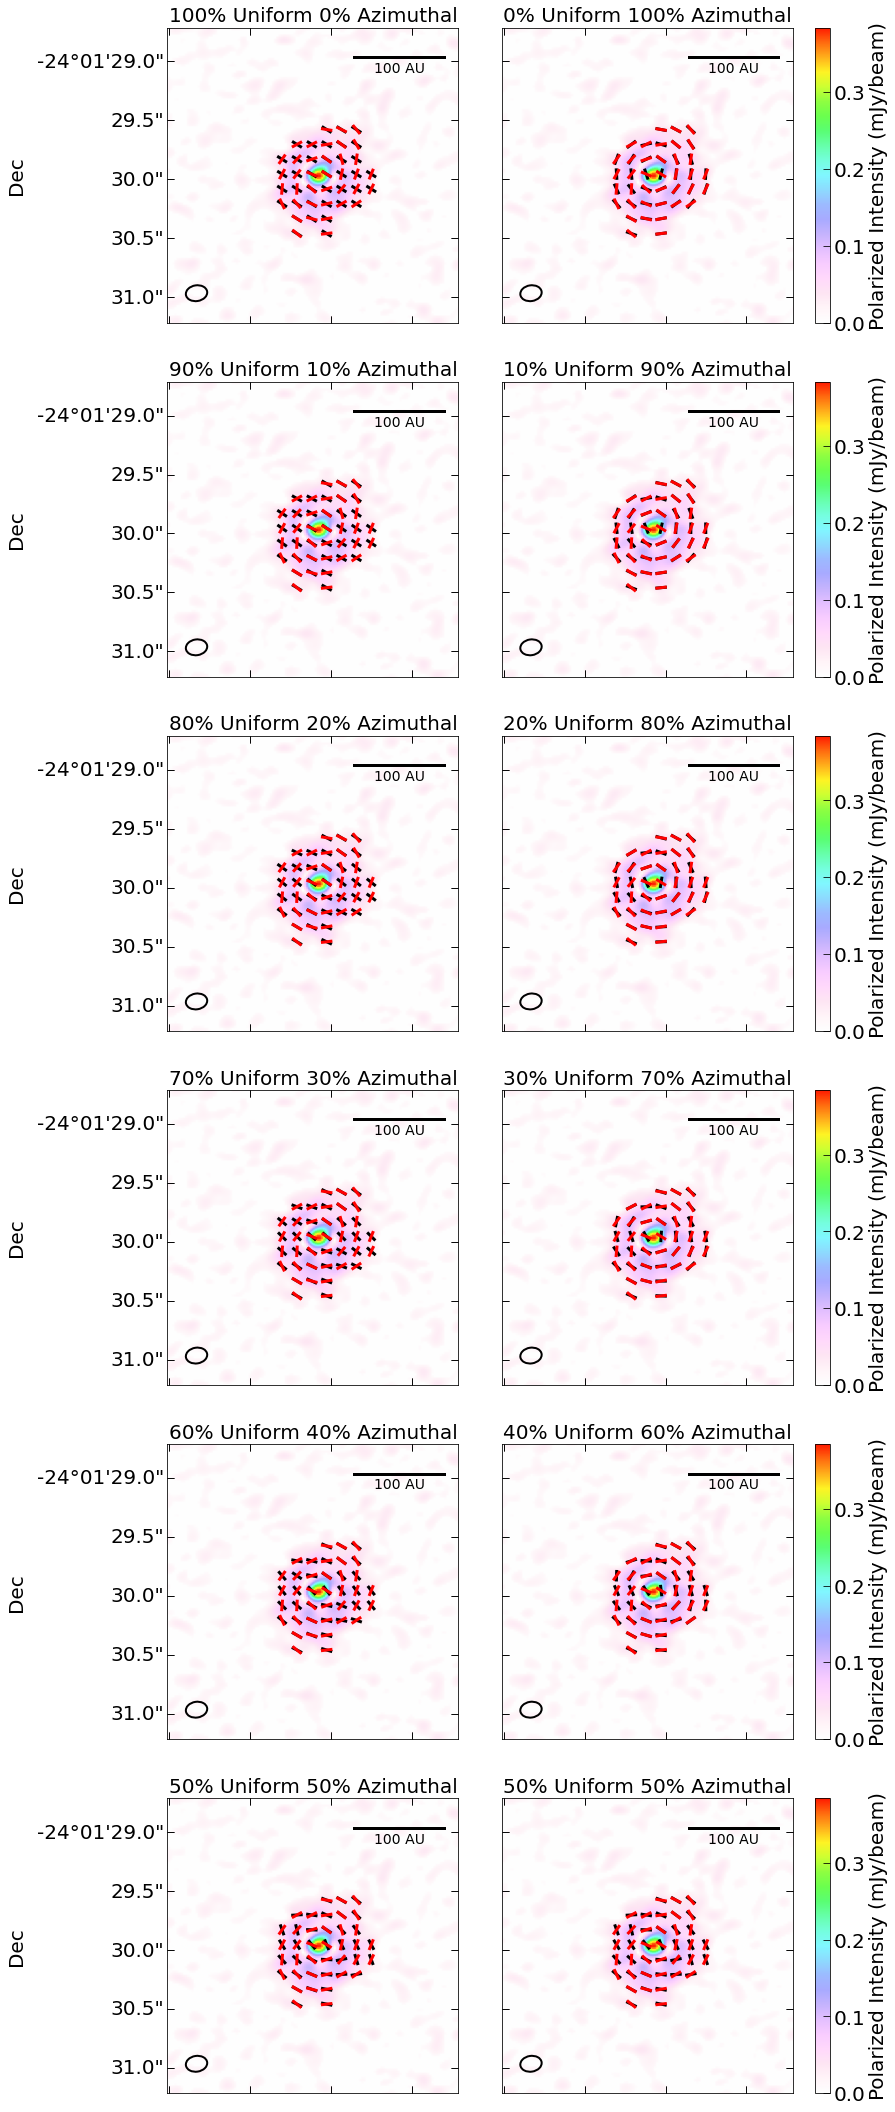

In [23]:
# Define the figure and subplots
nrows, ncols = 6, 2
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 38), constrained_layout=True, 
                         subplot_kw={'projection': StokesI_wcs},
                         gridspec_kw={'wspace': -1})


# Loop through subplots
for i, ax in enumerate(axes.flat):
    if i >= len(ratio_grid_plot_titles):
        ax.axis("off")  # Hide empty subplots if there is extra space
        continue
    
    # Create blank grid
    row, col = divmod(i, ncols)
    create_blank_grid(row, col, ax, 
                      PolarizedIntensity_data_2d_mJy, 'Polarized Intensity (mJy/beam)', 0.5, 
                      StokesI_wcs, soft_colormap_v2, 
                      xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                      BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                      max_length_pix, reference_fraction)
    
    ax.set_title(ratio_grid_plot_titles[i], fontsize=20)
    
    # Add vector plots
    for row in vector_data_plotting_grid[i]:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw = 3, label = 'Model')
        
    # Plot vector data on the first subplot (axes[0, 0])
    for row in vector_data_actual_same_length_cartesian:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw = 3, label = 'Real')
    
    # Set axis labels and ticks
    if col == 0:
        ax.set_ylabel('Dec', fontsize=axis_label_fs)
        ax.tick_params(axis="y", which="both", left=True, labelleft=True)
    else:
        ax.tick_params(axis="y", which="both", left=True, labelleft=False)

    if row == nrows - 1:
        ax.set_xlabel('RA', fontsize=axis_label_fs)
        ax.tick_params(axis="x", which="both", bottom=True, labelbottom=True)
    else:
        ax.tick_params(axis="x", which="both", bottom=True, labelbottom=False)
        
        
    # ax.text(xmin + 5, ymax - 5, f"{i}", fontsize=16, color='blue', ha='left', va='top')

    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.minorticks_on()
    ax.tick_params(axis="x", which="major", direction="in", bottom=True, top=True, length=7, labelsize=axis_num_fs - 10)
    ax.tick_params(axis="y", which="major", direction="in", left=True, right=True, length=7, labelsize=axis_num_fs)

plt.show()

## Find the best one

In [24]:
min_index = find_best_fit_ratio_model(vector_angle_actual_same_length_astronomy, testing_vector_angles)

the length of chi_squared_values is : 11
Chi-squared values for ratio models:
  100 U 0 A: χ² = 48.800
  90 U 10 A: χ² = 49.518
  80 U 20 A: χ² = 50.664
  70 U 30 A: χ² = 52.573
  60 U 40 A: χ² = 56.011
  50 U 50 A: χ² = 64.950
  40 U 60 A: χ² = 55.681
  30 U 70 A: χ² = 55.501
  20 U 80 A: χ² = 58.192
  10 U 90 A: χ² = 44.087
  0 U 100 A: χ² = 37.743

Best-fit ratio model: 0 U 100 A (χ² = 37.743)


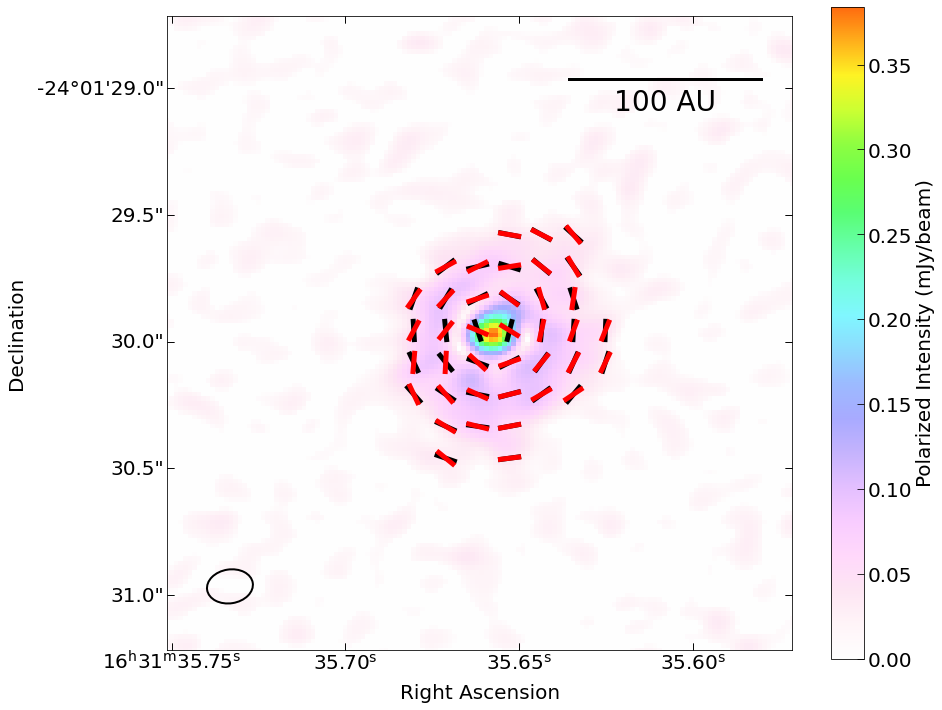

In [25]:
#*** not plotting rght one
fig, ax = create_base_plot(StokesI_wcs, PolarizedIntensity_data_2d_mJy, 'Polarized Intensity (mJy/beam)' , 
                           soft_colormap_no_red, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)

# Add vector plots
for row in vector_data_list_100U_to_100A[min_index]:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw = 5, label = 'Best Model')

# Plot vector data on the first subplot (axes[0, 0])
for row in vector_data_actual_same_length_cartesian:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw = 5, label = 'Real')

# Gaussian Model

In [26]:
theta_rad = major_angle_rad_cartesian_band6
# theta_rad = minor_angle_rad_cartesian

In [27]:
phi_values = [2, 3, 4, 5, 6, 7]

chi_values = []
vector_angles = []
all_values = []

In [28]:
BMAJ_pix_values =  np.array([10, 20, 30, 40, 50]) # + np.array(BMAJ_pix, dtype=int)
BMIN_pix_values =  np.array([10, 20, 30, 40, 50]) # + np.array(BMIN_pix, dtype=int)

# Print results
print(f'The BMAJ pix values we will test are: {BMAJ_pix_values}')
print(f'The BMIN pix values we will test are: {BMIN_pix_values}')

The BMAJ pix values we will test are: [10 20 30 40 50]
The BMIN pix values we will test are: [10 20 30 40 50]


In [29]:
# import numpy as np

# # Count the number of zeros and NaNs in PolarizedIntensity_data_2d_mJy
# zeros_poli_data = np.sum(PolarizedIntensity_data_2d_mJy == 0)
# nans_poli_data = np.sum(np.isnan(PolarizedIntensity_data_2d_mJy))

# # Count the number of zeros and NaNs in PolarizedIntensity_err_data_2d_mJy
# zeros_poli_err_data = np.sum(PolarizedIntensity_err_data_2d_mJy == 0)
# nans_poli_err_data = np.sum(np.isnan(PolarizedIntensity_err_data_2d_mJy))

# # Print the results
# print(f"PolarizedIntensity_data_2d_mJy: {zeros_poli_data} zeros, {nans_poli_data} NaNs")
# print(f"PolarizedIntensity_err_data_2d_mJy: {zeros_poli_err_data} zeros, {nans_poli_err_data} NaNs")


In [30]:
for x in range(0, nx, step_band4):
        for y in range(0, ny, step_band4):
            print(PolarizedIntensity_data_2d_mJy[y, x] / PolarizedIntensity_err_data_2d_mJy[y, x])

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
nan
1.0
1.0
1.0
1.0
nan
nan
nan
nan
1.0
1.0
1.0
1.0
nan
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
nan
nan
nan
1.0
1.0
1.0
nan
1.0
nan
1.0
nan
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
nan
1.0
nan
1.0
1.0
1.0
1.0
1.0
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
nan
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
nan
1.0
nan
1.0
1.0
1.0
1.0
nan
nan
nan
nan
1.0
1.0
1.0
nan
1.0
nan
1.0
1.0
1.0
1.0
nan
1.0
nan
1.0
nan
1.0
1.0
nan
nan
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
nan
1.0
1.0
nan
1.0
1.0
nan
1.0
nan
nan
1.0
nan
1.0

/var/folders/p9/hcwv87bd7lxfdw1nmx4wt8d00000gn/T/ipykernel_72854/2554162899.py:3: RuntimeWarning: invalid value encountered in float_scalars
  print(PolarizedIntensity_data_2d_mJy[y, x] / PolarizedIntensity_err_data_2d_mJy[y, x])



nan
nan
1.0
nan
1.0
1.0
nan
1.0
nan
nan
nan
1.0
1.0
nan
1.0
1.0
nan
1.0
1.0
1.0
1.0
nan
nan
1.0
nan
nan
1.0
1.0
nan
1.0
1.0
nan
1.0
1.0
1.0
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
nan
nan
1.0
1.0
1.0
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
nan
nan
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
nan
nan
1.0
nan
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
nan
1.0
nan
1.0
1.0
nan
nan
1.0
nan
nan
nan
1.0
nan
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
nan
1.0
1.0
1.0
1.0
1.0
nan
nan
1.0
nan
1.0
1.0
nan
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
nan
1.0
1.0
nan
1.0
nan
nan
1.0
1.0
nan
nan
nan
1.0
nan
1.0
1.0
1.0
nan
1.0
1.0
nan
1.0
1.0
1.0
nan
1.0
1.0
1.0
nan
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
nan
1.0
1.0
nan
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
nan
nan
1.0
1.0
nan
1.0
1.0
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
nan
1.0
nan

nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
nan
nan
nan
nan
nan
1.0
nan
1.0
nan
nan
1.0
nan
nan
1.0
1.0
1.0
nan
1.0
nan
nan
nan
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
nan
1.0
1.0
1.0
nan
1.0
nan
1.0
1.0
nan
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
nan
nan
1.0
nan
1.0
1.0
nan
1.0
1.0
1.0
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
nan
1.0
1.0
1.0
nan
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
nan
nan
1.0
1.0
1.0
nan
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
nan
1.0
nan
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
nan
nan
1.0
nan
nan
nan
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
nan
nan
nan
1.0
nan
1.0
nan
nan
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
nan
1.0
nan
nan
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
nan
nan
nan
nan
1.0
1.0
1.0
1.0
nan
1.0
1.0
nan
nan
1.0
1.0
nan
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
nan
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
nan
nan


1.0
nan
nan
1.0
nan
1.0
1.0
nan
nan
1.0
nan
1.0
nan
1.0
1.0
1.0
1.0
nan
nan
1.0
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
nan
1.0
1.0
nan
1.0
nan
nan
1.0
1.0
nan
nan
1.0
1.0
nan
1.0
1.0
nan
1.0
1.0
nan
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
nan
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
nan
1.0
nan
nan
nan
nan
nan
nan
nan
1.0
1.0
nan
1.0
nan
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
nan
nan
nan
1.0
1.0
1.0
nan
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
nan
nan
1.0
nan
1.0
1.0
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
nan
1.0
1.0
nan
1.0
nan
1.0
1.0
nan
nan
1.0
1.0
1.0
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
nan
nan
nan
nan
1.0
1.0
1.0
nan
nan
nan
1.0
nan
1.0
1.0
nan
nan
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
nan
1.0
nan
nan
nan
1.0
nan
1.0
nan
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
nan
nan
nan
1.0


1.0
1.0
nan
1.0
nan
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
nan
nan
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
nan
1.0
nan
1.0
1.0
1.0
1.0
nan
1.0
nan
nan
1.0
1.0
1.0
nan
nan
1.0
nan
1.0
nan
1.0
1.0
1.0
nan
1.0
nan
1.0
1.0
1.0
nan
1.0
nan
nan
1.0
1.0
1.0
1.0
1.0
nan
nan
1.0
1.0
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
nan
1.0
nan
1.0
nan
nan
1.0
1.0
nan
1.0
nan
nan
1.0
1.0
nan
1.0
1.0
1.0
nan
1.0
nan
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
nan
nan
nan
nan
nan
nan
1.0
nan
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
nan
1.0
nan
nan
1.0
1.0
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
nan
nan
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
nan
nan
1.0
1.0
1.0
nan
nan
nan
1.0
nan
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
nan
nan
1.0
nan
nan
nan
1.0
1.0
nan
nan
1.0
1.0
1.0
nan
1.0
1.0
nan
1.0
nan
1.0
1.0
1.0
1.0
nan
1.0
nan
1.0
1.0
nan
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
nan
1.0
1.0
1.0
nan
nan
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0


1.0
nan
nan
1.0
1.0
nan
1.0
1.0
nan
nan
nan
1.0
1.0
nan
1.0
1.0
nan
1.0
1.0
nan
1.0
1.0
1.0
1.0
nan
1.0
nan
1.0
1.0
1.0
1.0
nan
1.0
nan
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
nan
1.0
nan
nan
1.0
nan
1.0
1.0
1.0
1.0
nan
1.0
nan
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
nan
nan
1.0
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
nan
1.0
nan
1.0
nan
1.0
1.0
nan
1.0
1.0
nan
nan
1.0
1.0
nan
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
nan
nan
1.0
nan
1.0
nan
1.0
1.0
1.0
nan
nan
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
nan
1.0
nan
nan
1.0
1.0
nan
1.0
nan
1.0
nan
1.0
nan
1.0
1.0
1.0
1.0
1.0
nan
nan
1.0
1.0
1.0
nan
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
nan
nan
1.0
1.0
nan
1.0
nan
1.0
1.0
1.0
1.0
nan
nan
1.0
nan
nan
1.0
nan
nan
nan
1.0
nan
nan
1.0
nan
nan
1.0
1.0
1.0
nan
1.0
nan
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
nan
1.0
nan
1.0
nan
1.0
nan
1.0
nan
nan
nan
nan
nan
nan
1.0


1.0
1.0
nan
1.0
nan
1.0
nan
nan
nan
1.0
1.0
nan
1.0
1.0
nan
nan
nan
nan
1.0
nan
1.0
nan
1.0
nan
1.0
nan
1.0
nan
nan
1.0
nan
1.0
nan
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
nan
nan
nan
nan
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
nan
1.0
nan
1.0
1.0
nan
1.0
nan
1.0
1.0
1.0
nan
1.0
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
nan
nan
nan
1.0
1.0
nan
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
nan
nan
1.0
nan
nan
nan
1.0
1.0
1.0
nan
1.0
nan
nan
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
nan
nan
nan
1.0
nan
nan
nan
1.0
1.0
nan
1.0
1.0
nan
1.0
nan
1.0
nan
1.0
nan
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
nan
nan
1.0
1.0
nan
1.0
1.0
nan
1.0
nan
1.0
1.0
1.0
1.0
nan
nan
1.0
1.0
nan
1.0
1.0
1.0
nan
nan
1.0
1.0
nan
nan
nan
1.0
1.0
1.0
1.0
nan
1.0
nan
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
nan
nan
1.0
1.0


1.0
1.0
1.0
nan
1.0
1.0
nan
1.0
1.0
1.0
nan
1.0
nan
1.0
1.0
nan
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
nan
nan
nan
1.0
nan
1.0
1.0
nan
nan
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
nan
nan
1.0
nan
1.0
1.0
nan
1.0
1.0
1.0
1.0
nan
nan
1.0
1.0
1.0
1.0
nan
1.0
1.0
nan
1.0
nan
1.0
nan
1.0
1.0
nan
nan
1.0
1.0
nan
1.0
nan
nan
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
nan
nan
nan
1.0
nan
nan
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
nan
nan
nan
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
nan
1.0
1.0
1.0
1.0
nan
nan
1.0
nan
1.0
nan
1.0
1.0
1.0
nan
1.0
nan
1.0
1.0
1.0
nan
1.0
nan
nan
nan
1.0
1.0
nan
nan
nan
nan
nan
nan
1.0
nan
nan
1.0
1.0
nan
1.0
1.0
1.0
1.0
nan
1.0
1.0
nan
nan
1.0
1.0
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
nan
1.0
1.0
1.0
nan
nan
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
nan
1.0
1.0
1.0
nan
nan
1.0
nan
1.0
1.0
1.0
nan
1.0
nan
1.0
1.0
1.0
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0
1.0
nan
nan
1.0
1.0
nan
nan
nan
nan
1.0
nan
nan
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
nan
1.0
1.0


In [31]:
# Dictionary to store results
results = {}

results_test = []
gaussian_save = []

for phi_val in phi_values: 
    for BMAJ_pix_val in BMAJ_pix_values:
        for BMIN_pix_val in BMIN_pix_values:
            
            # Run the gaussian model function
            # --------------------------------------------------------------------------------------------------------------------------------------------
            GaussianUniformRatios, GaussianAzimuthalRatios, _, _ = gaussian_2d_flat_topped_tilted_model(nx, ny, 
                                                                                                        theta_rad, phi_val, 
                                                                                                        BMIN_pix_val, BMAJ_pix_val, 
                                                                                                        RA_centre_pix, Dec_centre_pix)
            # --------------------------------------------------------------------------------------------------------------------------------------------
            
            


            # Recovere the Q, U and vector angle
            # --------------------------------------------------------------------------------------------------------------------------------------------
            _, _, _, vectors_data, vectors_angle = mix_StokesQU_and_generate_vectors_band4(GaussianUniformRatios, GaussianAzimuthalRatios, 
                                                                                     StokesQ_grid_100Uniform, 
                                                                                     StokesU_grid_100Uniform,
                                                                                     StokesQ_grid_100Azimuthal, 
                                                                                     StokesU_grid_100Azimuthal,
                                                                                     ny, nx, 
                                                                                     PolarizedIntensity_data_2d_mJy, PolarizedIntensity_err_data_2d_mJy, 
                                                                                     PolarizationAngle_err_data_2d_deg)
            # ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
            # Create a key for the dictionary based on the values
            value_str = f"{int(phi_val)}_{int(BMAJ_pix_val)}_{int(BMIN_pix_val)}"  
    
            # Save the results in the dictionary
            results[f"vectors_data_{value_str}"] = vectors_data
            
            all_values.append((phi_val, BMAJ_pix_val, BMIN_pix_val))
            # ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
           
    
    
            # Calculate and append chi squared 
            # --------------------------------------------------------------
            observed = vectors_angle
            expected = vector_angle_actual_same_length_astronomy

            chi_squared = calculate_chi_squared_v2(observed, expected)
        
            chi_values.append(chi_squared)
            
            
            results_test.append((phi_val, BMAJ_pix_val, BMIN_pix_val, chi_squared))
            gaussian_save.append(GaussianUniformRatios)
            # --------------------------------------------------------------

/Users/audreyburggraf/Desktop/QUEEN'S/THESIS RESEARCH/PLOTTING C29 989/FUNCTIONS/MakingGridFunctions.py:52: RuntimeWarning: invalid value encountered in float_scalars
  if (POLI_mJy[y, x] / POLI_err_mJy[y, x] > 3


ValueError: operands could not be broadcast together with shapes (0,) (39,) 

In [ ]:
# Find the index of the minimum chi-squared value
min_index = chi_values.index(min(chi_values))

best_phi, best_BMAJ, best_BMIN = all_values[min_index]

In [ ]:
# Print the results
print(f'The lowest chi-squared value is for phi = {best_phi:.2f}, BMAJ = {best_BMAJ:.2f}, and BMIN = {best_BMIN:.2f}: χ² = {chi_values[min_index]:.3f}')

In [ ]:
# Access the best vector data from the dictionary
best_key = f"vectors_data_{int(best_phi)}_{int(best_BMAJ)}_{int(best_BMIN)}"
vector_data_gaussian_best = results[best_key]

In [ ]:
fig, ax = create_base_plot(StokesI_wcs, 
                           PolarizedIntensity_data_2d_mJy, 'Polarized Intensity (mJy/beam)', 
                           soft_colormap_no_red, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)

first_real = True
for row in vector_data_actual_same_length_cartesian:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw=5, 
            label='Real' if first_real else None)
    first_real = False
    
    
# Add vector plots, ensuring the label appears only once
first_best_model = True
for row in vector_data_gaussian_best:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw=5, 
            label='Best Gaussian Model' if first_best_model else None)
    first_best_model = False

ax.legend(fontsize = legend_text_fs)

In [ ]:
print(f'We have {len(all_values)} different options/runs to choose from')

In [ ]:
custom_indices = [1, 20]
custom_params = [all_values[i] for i in custom_indices]
gaussian_data = [gaussian_save[i] for i in custom_indices]

In [ ]:
# Optional: print info for logging
for idx, (phi, BMAJ, BMIN) in zip(custom_indices, custom_params):
    print(f'For custom index {idx}: phi = {phi:.2f}, BMAJ = {BMAJ:.2f}, BMIN = {BMIN:.2f}')

In [ ]:
# Convert results into structured 2D arrays
phi_list, BMAJ_list, BMIN_list, chi_list = zip(*results_test)  # Unpack into separate lists

# Reshape into 2D grids (len(a_values) rows, len(b_values) columns)
# Reshape into 3D grids
phi_grid = np.array(phi_list).reshape(len(phi_values),   len(BMAJ_pix_values), len(BMIN_pix_values))
BMAJ_grid = np.array(BMAJ_list).reshape(len(phi_values), len(BMAJ_pix_values), len(BMIN_pix_values))
BMIN_grid = np.array(BMIN_list).reshape(len(phi_values), len(BMAJ_pix_values), len(BMIN_pix_values))
CHI_grid = np.array(chi_list).reshape(len(phi_values),   len(BMAJ_pix_values), len(BMIN_pix_values))

In [ ]:
# Organize data
phi_dict = defaultdict(list)
bmaj_dict = defaultdict(list)
bmin_dict = defaultdict(list)

for phi, BMAJ, BMIN, chi in results_test:
    phi_dict[phi].append(chi)
    bmaj_dict[BMAJ].append(chi)
    bmin_dict[BMIN].append(chi)

# Compute averages
phi_avg = {phi: np.mean(chi_values) for phi, chi_values in phi_dict.items()}
bmaj_avg = {BMAJ: np.mean(chi_values) for BMAJ, chi_values in bmaj_dict.items()}
bmin_avg = {BMIN: np.mean(chi_values) for BMIN, chi_values in bmin_dict.items()}

In [ ]:
# Create figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot phi vs chi^2
axes[0].plot(list(phi_avg.keys()), list(phi_avg.values()), marker='o', linestyle='-', color = 'blue', lw = 4, ms = 15)
axes[0].set_xlabel(r'$\phi$', fontsize = axis_label_fs)
axes[0].set_ylabel(r'$\chi^2$', fontsize = axis_label_fs)
axes[0].set_title(r'$\phi$ vs $\chi^2$', fontsize = title_fs)

# Plot BMAJ vs chi^2
axes[1].plot(list(bmaj_avg.keys()), list(bmaj_avg.values()), marker='o', linestyle='-', color = 'red', lw = 4, ms = 15)
axes[1].set_xlabel('BMAJ', fontsize = axis_label_fs)
axes[1].set_ylabel(r'$\chi^2$', fontsize = axis_label_fs)
axes[1].set_title(r'BMAJ vs $\chi^2$', fontsize = title_fs)

# Plot BMIN vs chi^2
axes[2].plot(list(bmin_avg.keys()), list(bmin_avg.values()), marker='o', linestyle='-', color = 'forestgreen', lw = 4, ms = 15)
axes[2].set_xlabel('BMIN', fontsize = axis_label_fs)
axes[2].set_ylabel(r'$\chi^2$', fontsize = axis_label_fs)
axes[2].set_title(r'BMIN vs $\chi^2$', fontsize = title_fs)

plt.tight_layout()
plt.show()


In [ ]:
# Plotting the result
fig, ax = plt.subplots(3, 2, figsize=(20, 18))
 

# Loop over the first `num_plots` values of phi
for i, phi_fixed_index in enumerate(range(len(phi_values))):  

    BMAJ = BMAJ_grid[phi_fixed_index, :, :]  # Slice at fixed phi
    BMIN = BMIN_grid[phi_fixed_index, :, :]
    chi = CHI_grid[phi_fixed_index, :, :]
    
    row = i // 2  # Row index (0 or 1)
    col = i % 2   # Column index (0 or 1)
    
    # Create the contour plot
    contour = ax[row, col].contourf(BMAJ, BMIN, chi, 50, cmap=soft_colormap_v2)
    
    # Add colorbar
    cbar = fig.colorbar(contour, ax=ax[row, col], orientation='vertical')
    cbar.set_label(r'$\chi^2$', fontsize=cbar_fs)
    cbar.ax.tick_params(labelsize=axis_num_fs, which='major', length=7, direction="in")
    cbar.ax.tick_params(which='minor', length=4, direction="in")
    
    # Set title with actual c-value
    ax[row, col].set_title(rf'$\phi$ = {phi_values[phi_fixed_index]}', fontsize=title_fs)  

    # Labels
    ax[row, col].set_xlabel('BMAJ', fontsize=axis_label_fs)
    ax[row, col].set_ylabel('BMIN', fontsize=axis_label_fs)

    # Ticks
    ax[row, col].minorticks_on()
    ax[row, col].tick_params(axis="x", which="major", direction="in", bottom=True, top=True, length=7, labelsize=axis_num_fs)
    ax[row, col].tick_params(axis="y", which="major", direction="in", left=True, right=True, length=7, labelsize=axis_num_fs)

plt.tight_layout()
plt.show()


In [ ]:
# Plotting the result
fig, ax = plt.subplots(3, 2, figsize=(20, 18))
 

# Loop over the first `num_plots` values of phi
for i, BMIN_fixed_index in enumerate(range(len(BMIN_pix_values))):  

    phi = phi_grid[:, :, BMIN_fixed_index]
    BMAJ = BMAJ_grid[:, :, BMIN_fixed_index]  
    chi = CHI_grid[:, :, BMIN_fixed_index]
    
    row = i // 2  # Row index (0 or 1)
    col = i % 2   # Column index (0 or 1)
    
    # Create the contour plot
    contour = ax[row, col].contourf(BMAJ, phi, chi, 50, cmap=soft_colormap_v2)
    
    # Add colorbar
    cbar = fig.colorbar(contour, ax=ax[row, col], orientation='vertical')
    cbar.set_label(r'$\chi^2$', fontsize=cbar_fs)
    cbar.ax.tick_params(labelsize=axis_num_fs, which='major', length=7, direction="in")
    cbar.ax.tick_params(which='minor', length=4, direction="in")
    
    # Set title with actual c-value
    ax[row, col].set_title(rf'BMIN = {BMIN_pix_values[BMIN_fixed_index]}', fontsize=title_fs)  

    # Labels
    ax[row, col].set_xlabel('BMAJ', fontsize=axis_label_fs)
    ax[row, col].set_ylabel(r'$\phi$', fontsize=axis_label_fs)

    # Ticks
    ax[row, col].minorticks_on()
    ax[row, col].tick_params(axis="x", which="major", direction="in", bottom=True, top=True, length=7, labelsize=axis_num_fs)
    ax[row, col].tick_params(axis="y", which="major", direction="in", left=True, right=True, length=7, labelsize=axis_num_fs)

plt.tight_layout()
plt.show()


In [ ]:
# Plotting the result
fig, ax = plt.subplots(3, 2, figsize=(20, 18))
 

# Loop over the first `num_plots` values of phi
for i, BMAJ_fixed_index in enumerate(range(len(BMAJ_pix_values))):  

    phi = phi_grid[:, BMAJ_fixed_index, :]
    BMIN = BMIN_grid[:, BMAJ_fixed_index, :]  
    chi = CHI_grid[:, BMAJ_fixed_index, :]
    
    row = i // 2  # Row index (0 or 1)
    col = i % 2   # Column index (0 or 1)
    
    # Create the contour plot
    contour = ax[row, col].contourf(BMIN, phi, chi, 50, cmap= soft_colormap_v2)
    
    # Add colorbar
    cbar = fig.colorbar(contour, ax=ax[row, col], orientation='vertical')
    cbar.set_label(r'$\chi^2$', fontsize=cbar_fs)
    cbar.ax.tick_params(labelsize=axis_num_fs, which='major', length=7, direction="in")
    cbar.ax.tick_params(which='minor', length=4, direction="in")
    
    # Set title with actual c-value
    ax[row, col].set_title(rf'BMAJ = {BMAJ_pix_values[BMAJ_fixed_index]}', fontsize=title_fs)  

    # Labels
    ax[row, col].set_xlabel('BMIN', fontsize=axis_label_fs)
    ax[row, col].set_ylabel(r'$\phi$', fontsize=axis_label_fs)

    # Ticks
    ax[row, col].minorticks_on()
    ax[row, col].tick_params(axis="x", which="major", direction="in", bottom=True, top=True, length=7, labelsize=axis_num_fs)
    ax[row, col].tick_params(axis="y", which="major", direction="in", left=True, right=True, length=7, labelsize=axis_num_fs)

plt.tight_layout()
plt.show()
